#Introduction

Decision trees are supervised learning algorithms used for both, classification and regression tasks where we will concentrate on classification in this first part of our decision tree tutorial.

Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have continuous but also categorical input and target features.

A decision tree mainly contains of a root node, interior nodes, and leaf nodes which are then connected by branches.
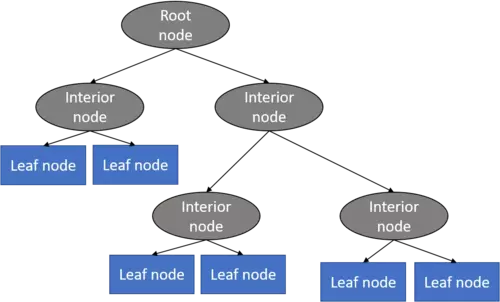

Decision trees are further subdivided whether the target feature is continuously scaled like for instance house prices or categorically scaled like for instance animal species.

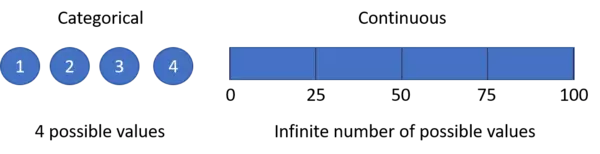


Steps
1. Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature

2. Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process

3. Grow the tree until we accomplish a stopping criteria --> create leaf nodes which represent the predictions we want to make for new query instances

4. Show query instances to the tree and run down the tree until we arrive at leaf nodes

5. DONE - Congratulations you have found the answers to your questions

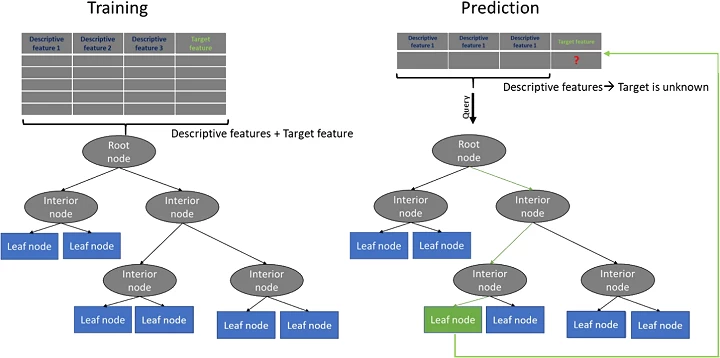

Here's an example, given a dataframe

In [ ]:
import pandas as pd

data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

features = data[["toothed","hair","breathes","legs"]]
target = data["species"]

data

We can predict a species based on those features.

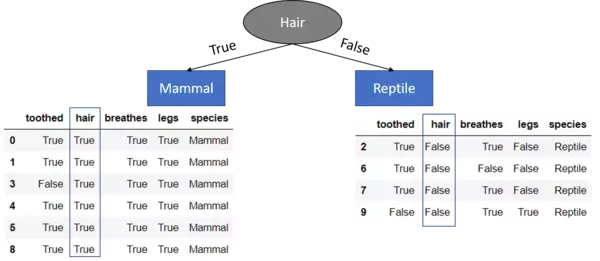

We can determine those species by the hair, but. What if we don't have that necessity in our dataframe? That's where decision tree comes up in place.

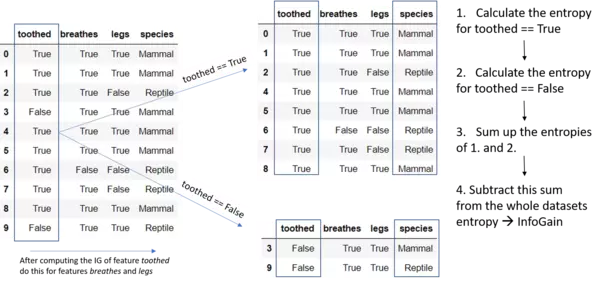
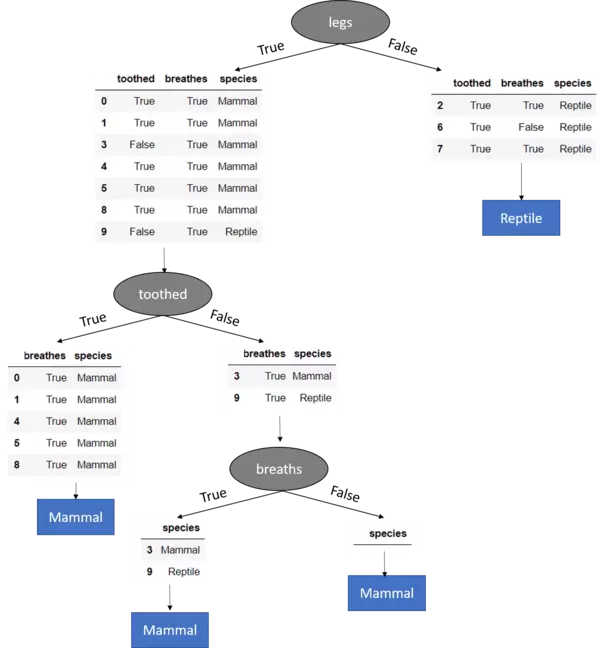

In [58]:
#Sklearn Example    (Classifier)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

data=pd.read_csv("Files/ZOO/zoo.data", header=None)
data.columns=["animal_name","hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone", "breathes","venomous","fins","legs","tail","domestic","catsize","type"]
data=data.drop("animal_name", axis=1)


#We gonna use type as testing the classifier here cuh
train_data=data.iloc[:80,:-1]
test_data=data.iloc[:-80,:-1]
train_label=data.iloc[:80,-1]
test_label=data.iloc[:-80,-1]

Model=DecisionTreeClassifier()
Model.fit(train_data, train_label)

Predictecd=Model.predict(test_data)
print(accuracy_score(test_label, Predictecd))

1.0


Score of predicted test: 0.9473684210526315


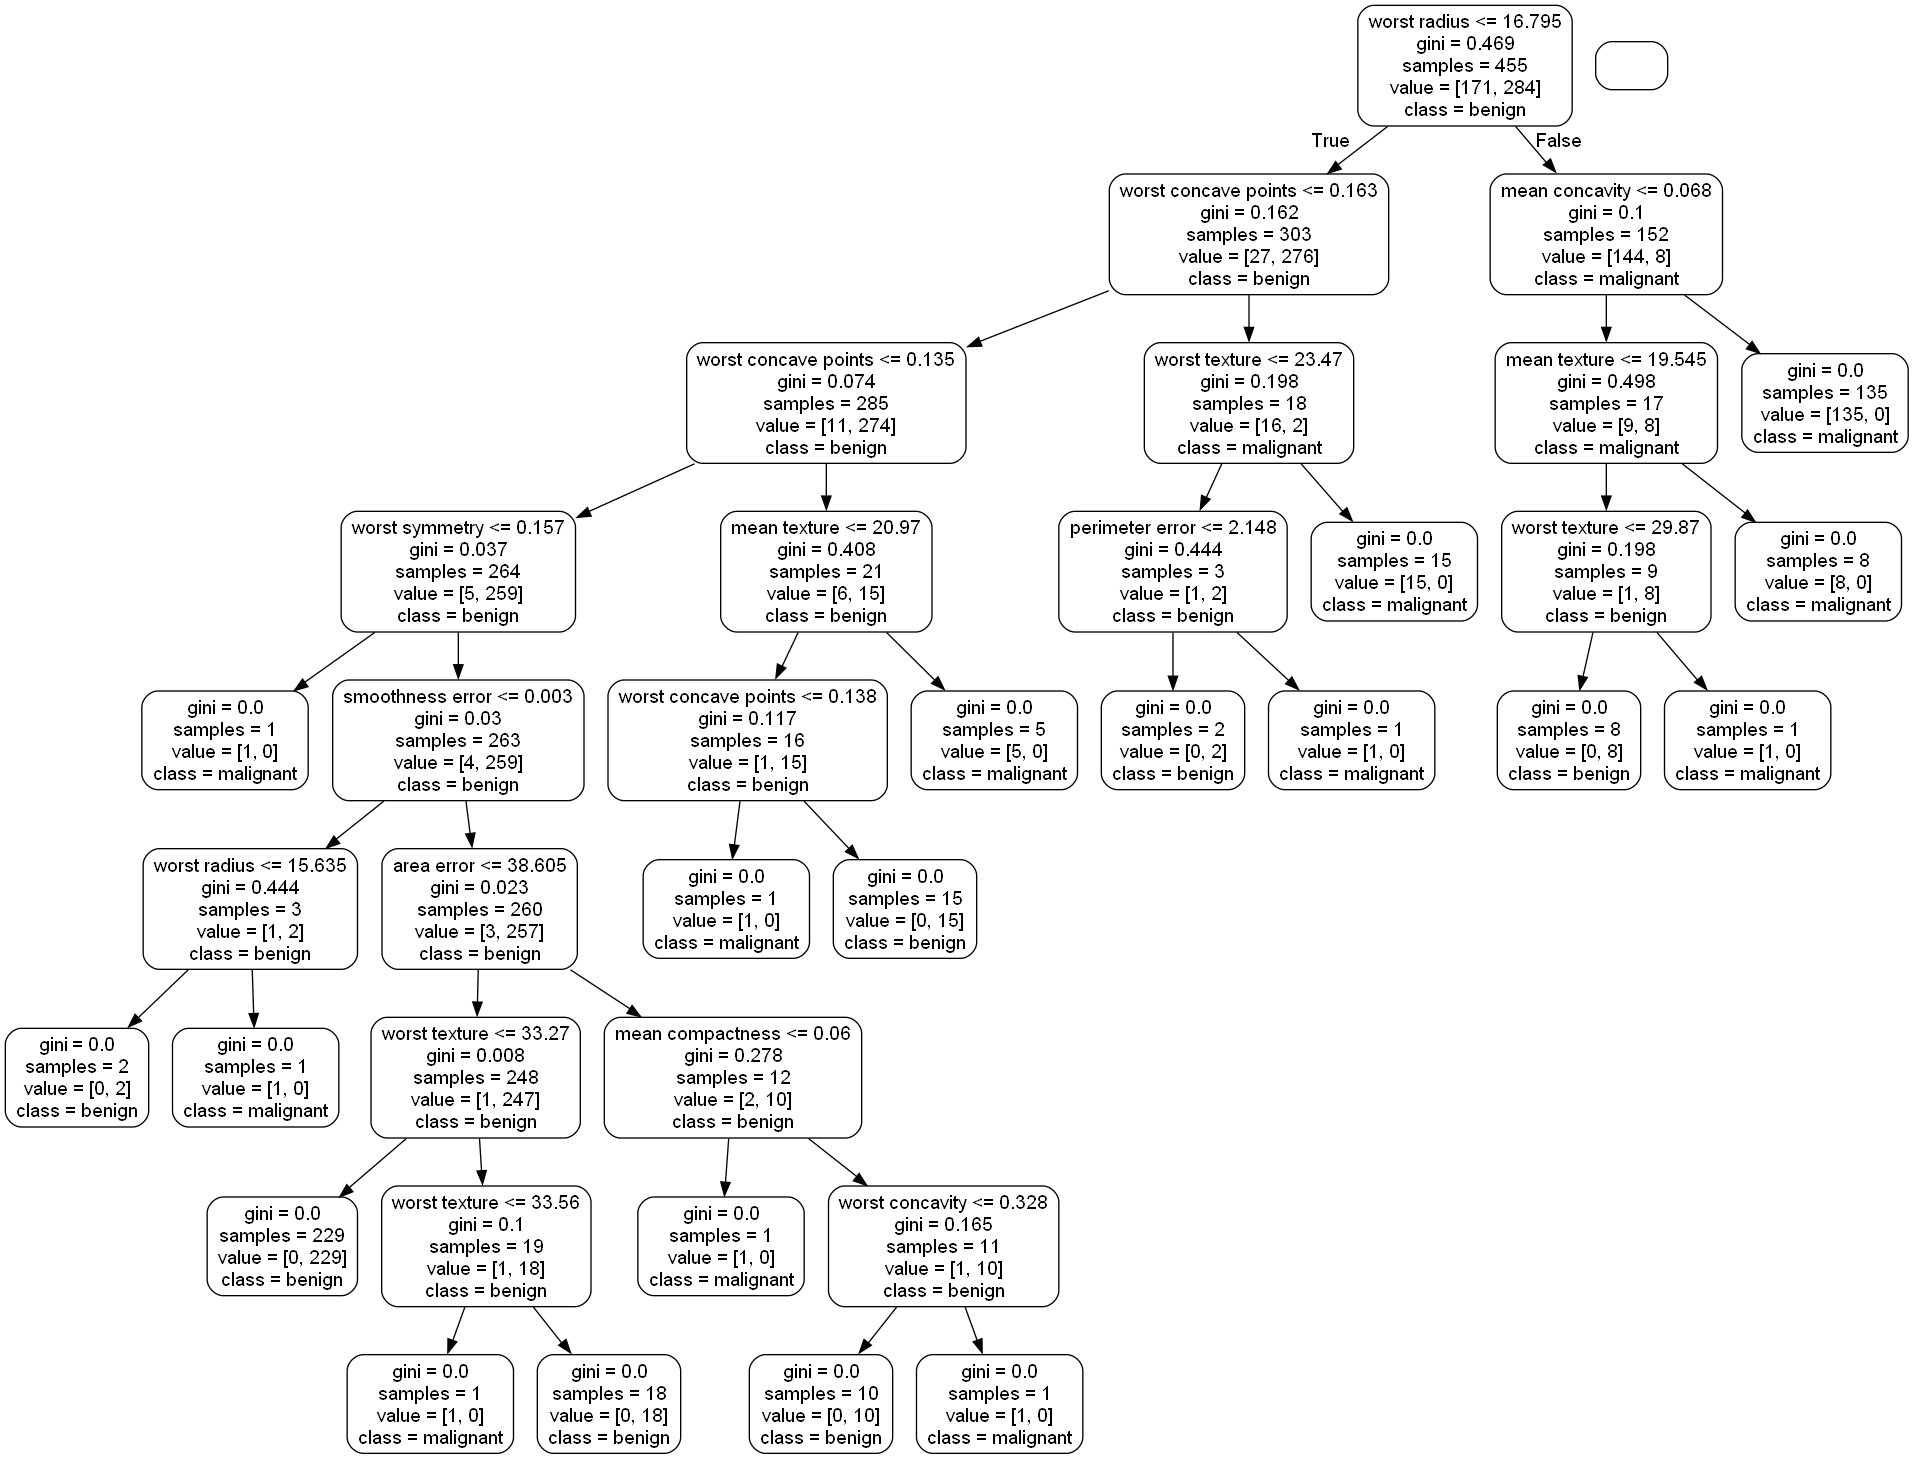

In [3]:
#Ykw, fuck this imma just learn smth off the internet LMAA

#libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

#These are for the visualization
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image  

#retain data
dummy=load_breast_cancer()
temp=dummy.data
label=dummy.target.reshape(-1,1)
df=pd.DataFrame(temp, columns=dummy.feature_names)
df.insert(len(df.columns), column="classification", value=label)

data=df.iloc[:,:-1]
label=df.iloc[:,-1]

#train test split
train_data, test_data, train_label, test_label = train_test_split(data, label, train_size= 0.8)

#model of decision tree classifier
model = DecisionTreeClassifier(criterion="gini", random_state=237356)
model.fit(train_data, train_label)

#predict
predicted=model.predict(test_data)

print(f'Score of predicted test: {accuracy_score(test_label, predicted)}')

#visualize
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=df.columns[:-1], class_names=dummy.target_names, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeBreast.png')
Image(graph.create_png()) 